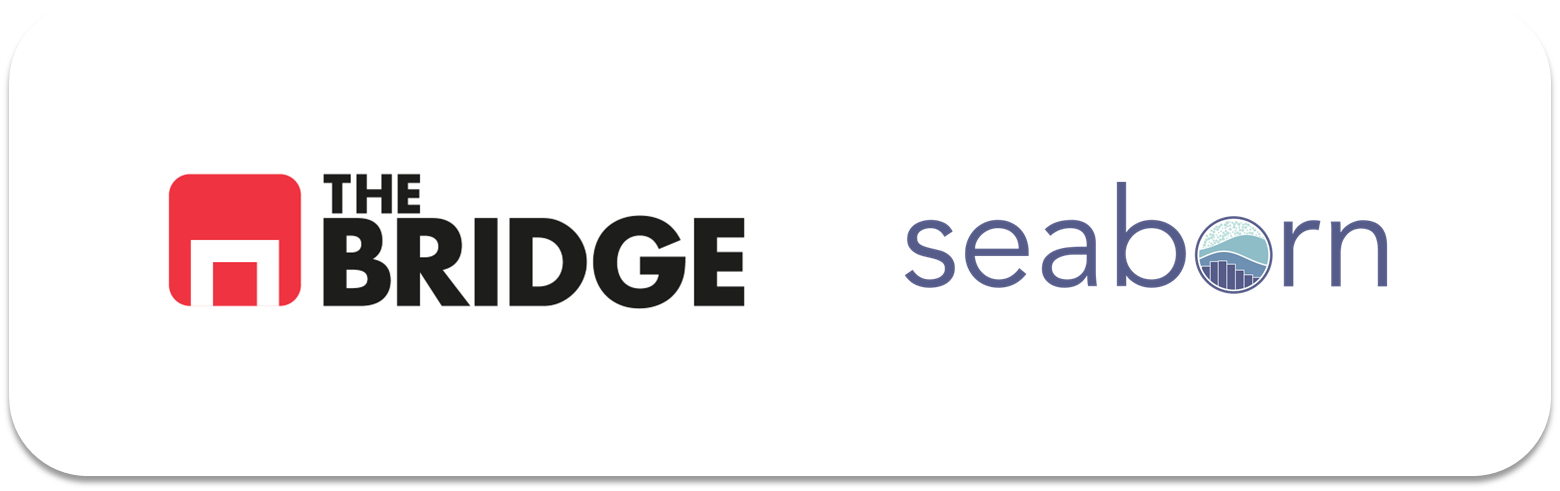

## PRACTICA OBLIGATORIA: **Visualización Avanzada y Presentación**

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## #1: Visualización

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [ ]:
ruta = "./data/california_cities.csv"
df = pd.read_csv(ruta)

print("Primeras filas del dataset:")
print(df.head())

print("\nDescripción de las columnas numéricas:")
print(df.describe())

print("\nInformación del DataFrame:")
print(df.info())

df = df.dropna()

print("\nNúmero de nulos por columna después de eliminar filas con NaN:")
print(df.isna().sum())

Primeras filas del dataset:
   Unnamed: 0         city       latd       longd  elevation_m  elevation_ft  \
0           0     Adelanto  34.576111 -117.432778        875.0        2871.0   
1           1  AgouraHills  34.153333 -118.761667        281.0         922.0   
2           2      Alameda  37.756111 -122.274444          NaN          33.0   
3           3       Albany  37.886944 -122.297778          NaN          43.0   
4           4     Alhambra  34.081944 -118.135000        150.0         492.0   

   population_total  area_total_sq_mi  area_land_sq_mi  area_water_sq_mi  \
0             31765            56.027           56.009             0.018   
1             20330             7.822            7.793             0.029   
2             75467            22.960           10.611            12.349   
3             18969             5.465            1.788             3.677   
4             83089             7.632            7.631             0.001   

   area_total_km2  area_land_km2  

### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños. NO TE PREOCUPES POR EL FORMATO DE LA LEYENDA (lo veremos en la sesión en vivo)

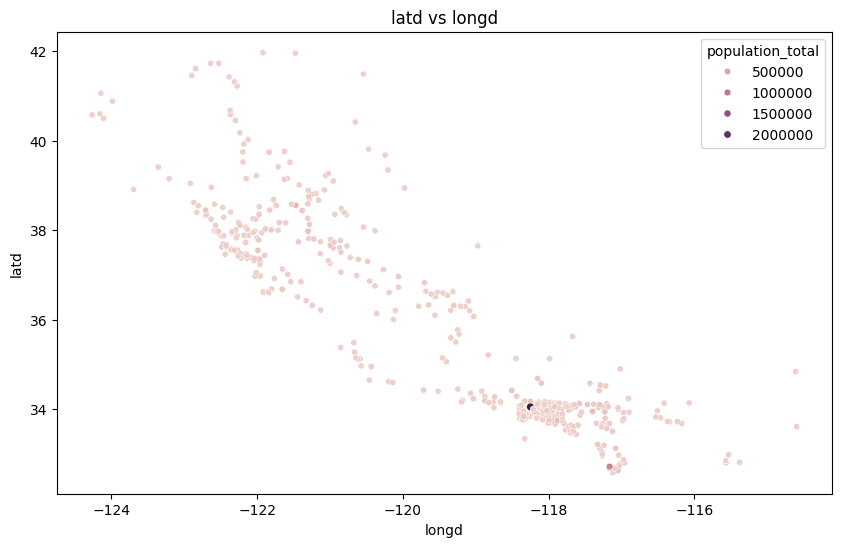

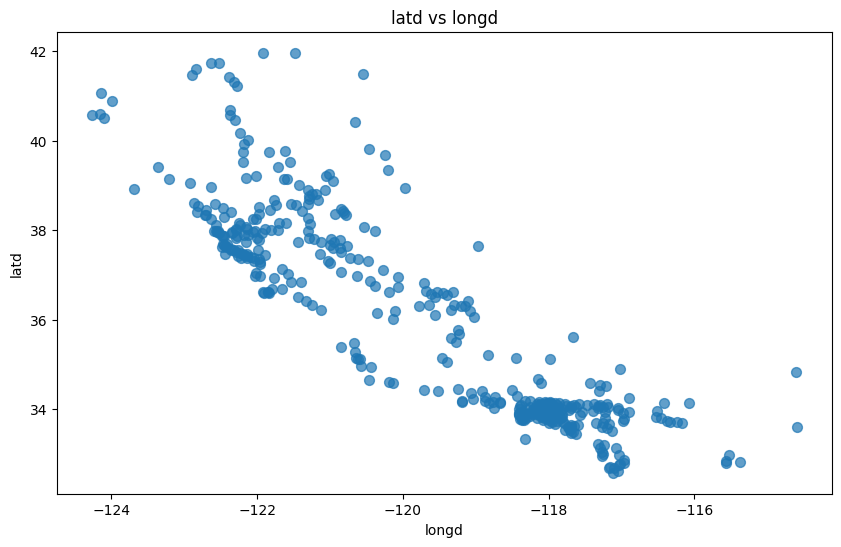

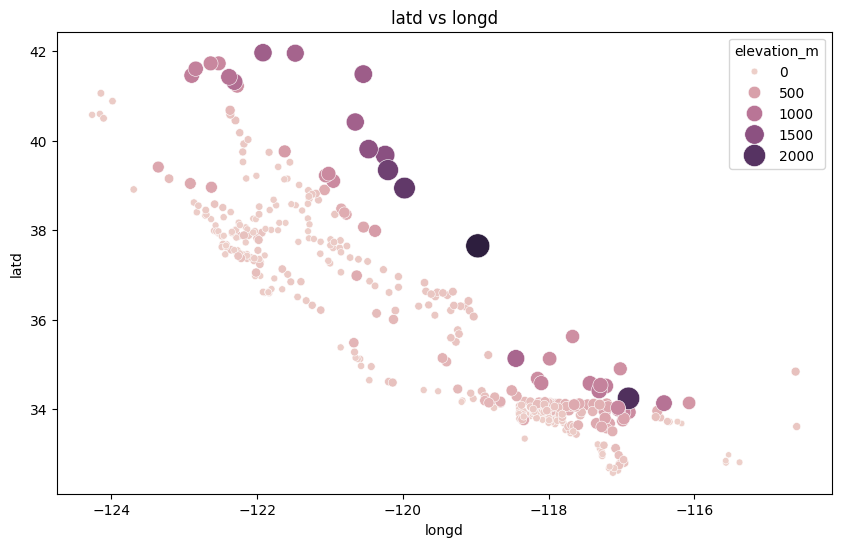

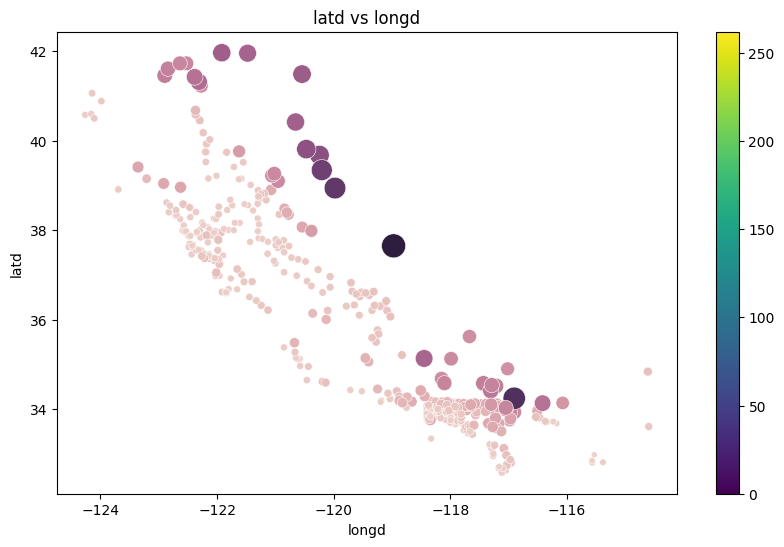

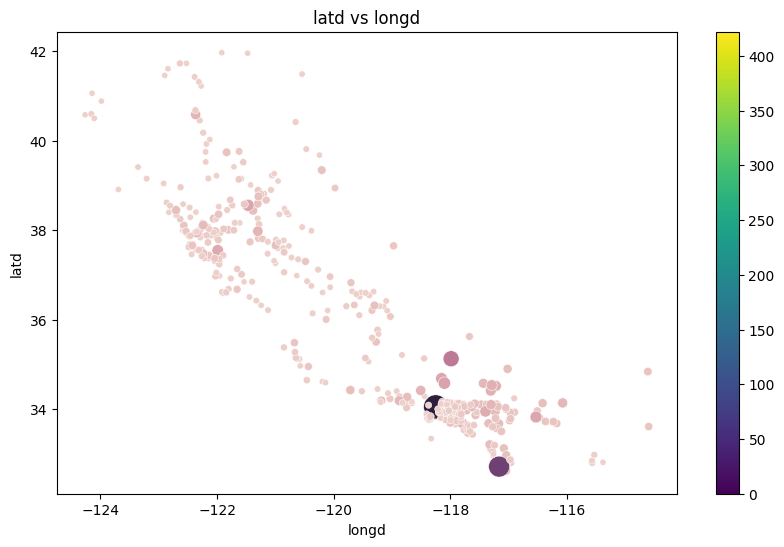

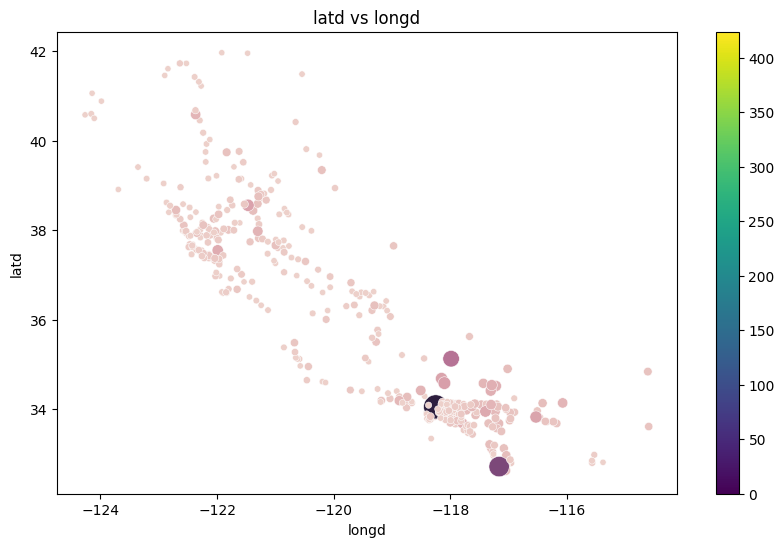

In [ ]:
def scatter_custom(df, x_col, y_col, cat_col=None, size=50, scale=1, legend_mode="legend"):

    data = df.copy()

    use_size = False
    if isinstance(size, str):
        if size not in data.columns:
            raise ValueError(f"La columna '{size}' no existe en el DataFrame")
        size_col = size
        use_size = True
        min_size = 20
        max_size = 300 * scale
    else:
        size_col = None
        min_size = None
        max_size = None    
    fig, ax = plt.subplots(figsize=(10, 6))

    if cat_col is not None:
        sns.scatterplot(data=data,x=x_col,y=y_col,hue=cat_col,size=size_col, sizes=(min_size, max_size), legend=(legend_mode == "legend"), ax=ax)
    else:
        ax.scatter(data[x_col], data[y_col], s=50, alpha=0.7)

    if legend_mode == "colorbar" and cat_col is not None:
        codes = data[cat_col].astype("category").cat.codes
        norm = plt.Normalize(codes.min(), codes.max())
        sm = plt.cm.ScalarMappable(norm=norm)
        plt.colorbar(sm, ax=ax)

    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f"{y_col} vs {x_col}")

    plt.show()

scatter_custom(df,x_col="longd",y_col="latd",cat_col="population_total",size="population_total",scale=1/10)
scatter_custom(df,x_col="longd",y_col="latd")
scatter_custom(df,x_col="longd",y_col="latd",cat_col="elevation_m",size="elevation_m")
scatter_custom(df,x_col="longd",y_col="latd",cat_col="elevation_ft",size="elevation_ft",legend_mode="colorbar")
scatter_custom(df,x_col="longd",y_col="latd",cat_col="area_total_km2",size="area_total_km2",legend_mode="colorbar")
scatter_custom(df,x_col="longd",y_col="latd",cat_col="area_land_km2",size="area_land_km2",legend_mode="colorbar")



### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_poblacion" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_poblacion" para el color.

Un ejemplo de como podría salir para que lo tengas de referencia: (olvidate de la leyenda, auque si quieres como extra puedes intentar ver cómo crearla así)

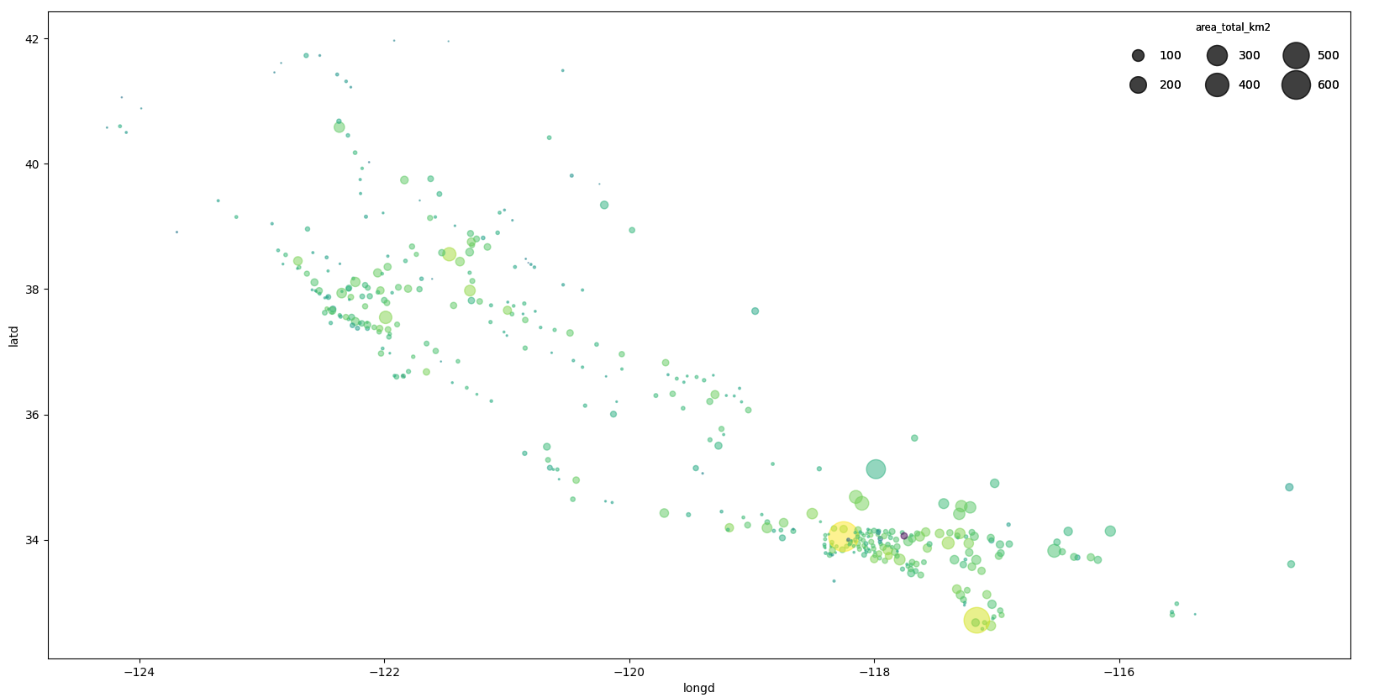

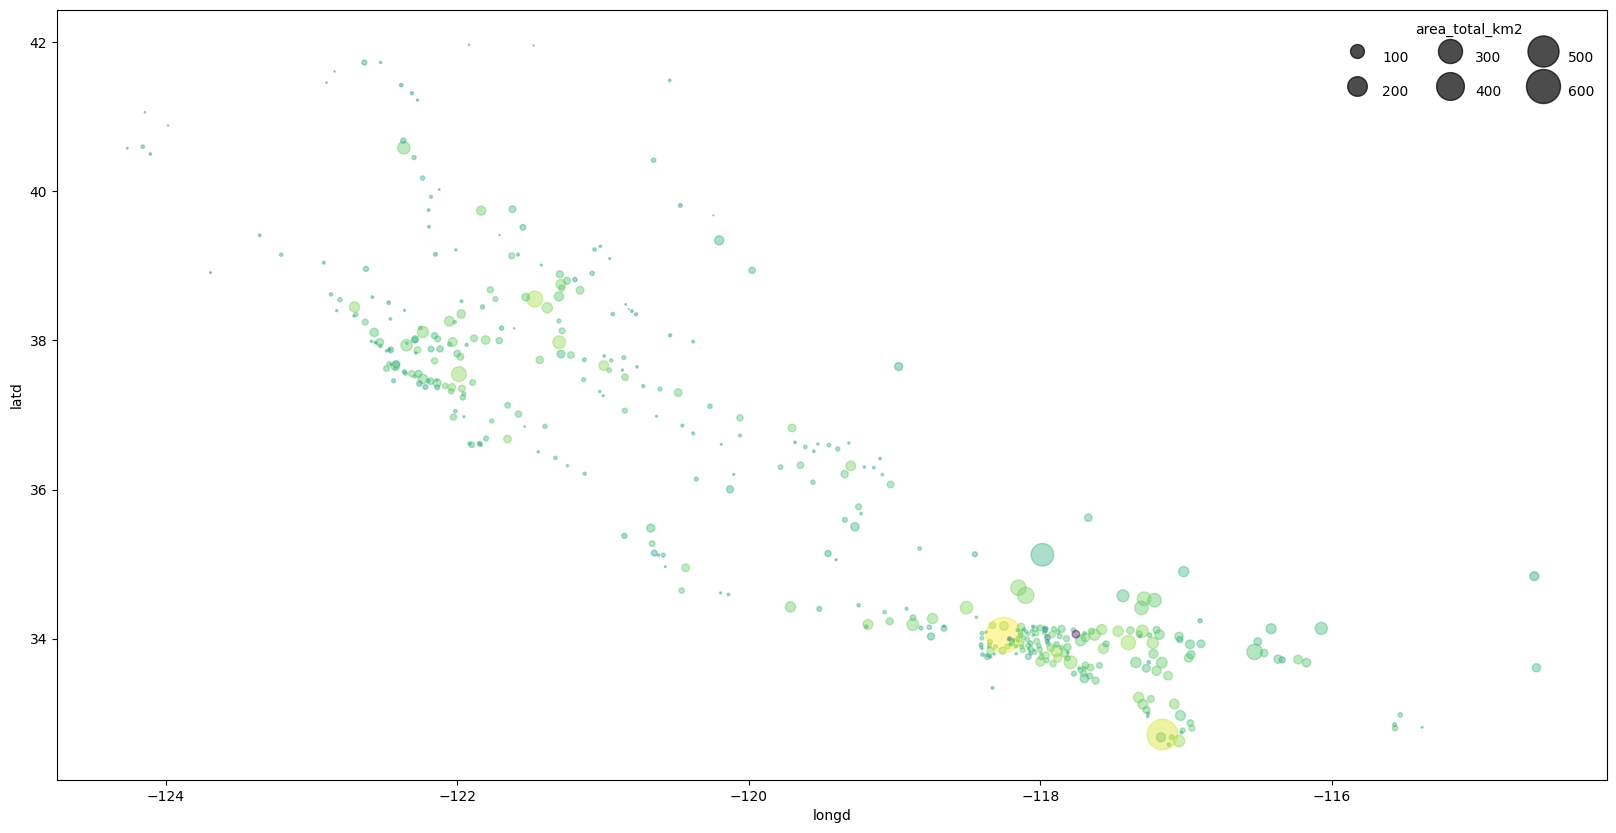

In [115]:

df["log_poblacion"] = np.log10(df["population_total"])

fig, ax = plt.subplots(figsize=(20, 10))

scale = 1/2

sc = ax.scatter(
    df["longd"],
    df["latd"],
    s=df["area_total_km2"] * scale,
    c=df["log_poblacion"],
    cmap="viridis",
    alpha=0.4
)

sizes_legend = [100, 200, 300, 400, 500, 600]

handles = [
    plt.scatter([], [], s=s, color="black", alpha=0.7)
    for s in sizes_legend
]

ax.legend(
    handles,
    sizes_legend,
    title="area_total_km2",
    loc="upper right",
    ncol=3,
    frameon=False,
    handleheight=2.7,
    columnspacing=2.0
)

ax.set_xlabel("longd")
ax.set_ylabel("latd")

plt.show()

## #2: Presentación

En esta parte tendrás que hacer dos cosas:

#2.1 Crear una presentación sencilla sobre el Titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  

1. El titanic fue un accidente con una tasa de mortalidad alta.  

2. Los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  
3. ...la clase en la que viajases tuvo una influencia significativa y podría explicar...  
4. ...las diferencias entre tasas de supervivencia de mujeres y niños.    
5. Además, aunque el puerto de embarque parece tener influencia, se podría asumir que más bien fue la clase de pasaje que embarcó en cada uno de ellos.  

#2.2 Las gráficas a emplear en la presentación debes generarlas en un notebook.  

Tienes que entregar ambas cosas: presentación y notebook :)

In [ ]:
from bootcampviztools import *
df_titanic = pd.read_csv("./data/titanic.csv")

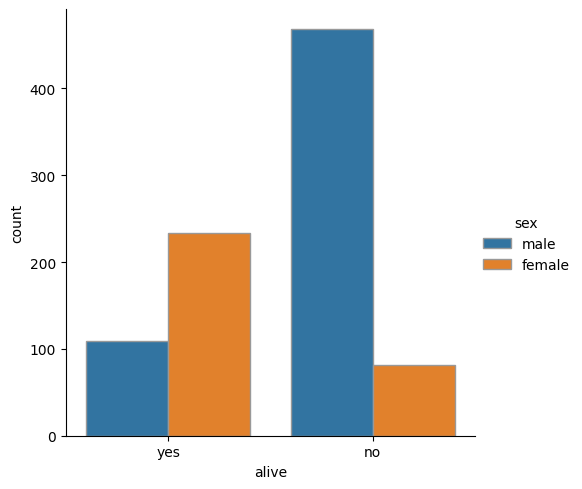

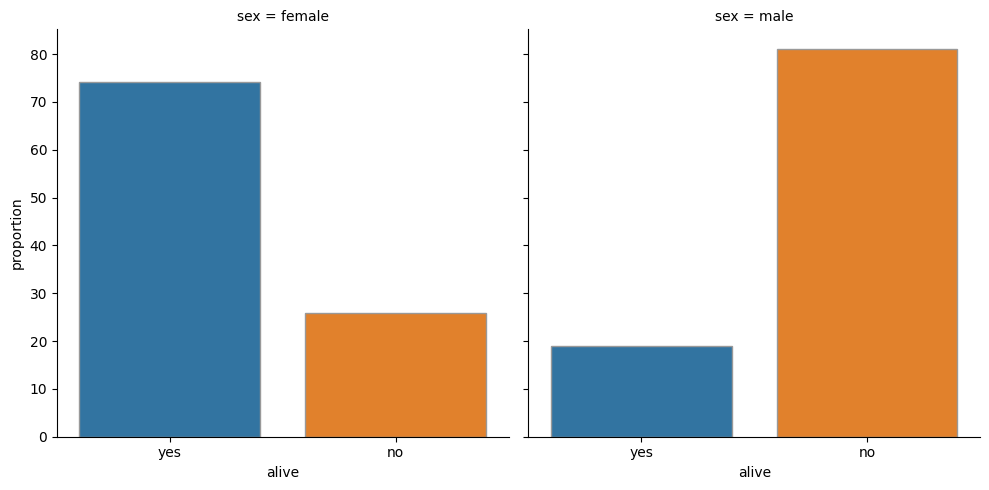

In [ ]:

# 1. El titanic fue un accidente con una tasa de mortalidad alta.
sns.catplot(x="alive", hue="sex", kind="count", edgecolor=".6",orient="V",data=df_titanic.sort_values("class"));

cat_colx ="alive"
cat_coly = "sex"
frecuencias_absolutas = df_titanic.groupby(cat_coly,as_index=False)[cat_colx].value_counts()
frecuencias_relativas = df_titanic.groupby(cat_coly,as_index=False)[cat_colx].value_counts(normalize = True)
frecuencias_relativas["proportion"] *= 100

sns.catplot(x="alive",
            y = "proportion",
            col="sex",
            hue = "alive",
            kind="bar",
            edgecolor=".6",
            data=frecuencias_relativas);




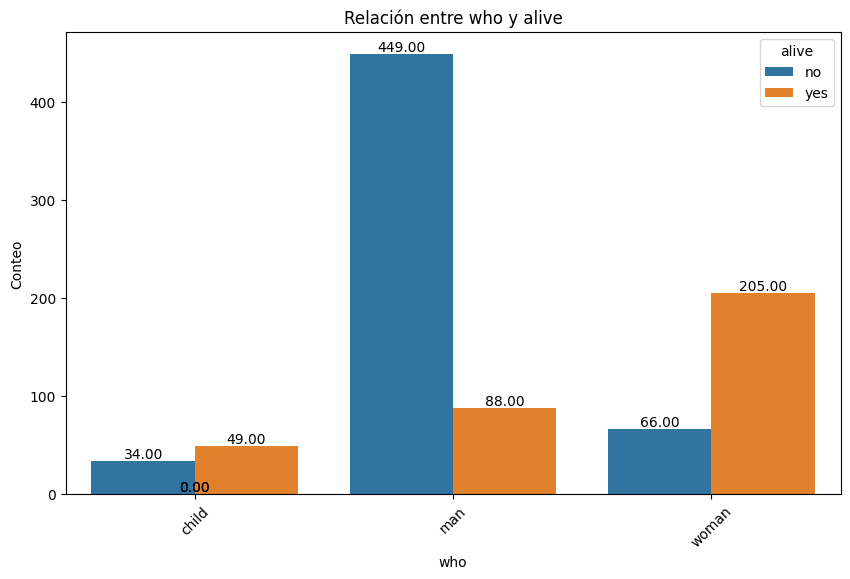

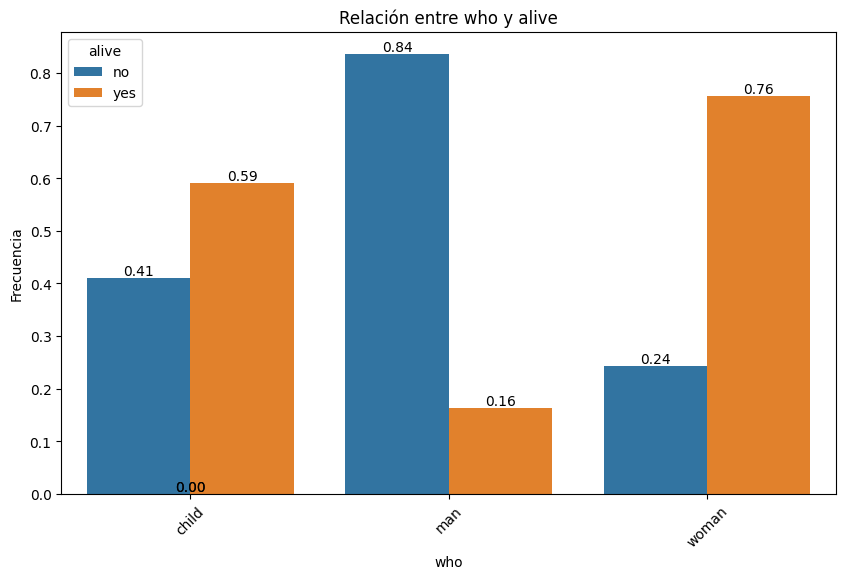

In [139]:
#2. Los datos apoyan que se dio el "Las mujeres y los niños primero", pero... 
plot_categorical_relationship_fin(df_titanic, "who", "alive", show_values = True)
plot_categorical_relationship_fin(df_titanic, "who", "alive", relative_freq = True, show_values = True)


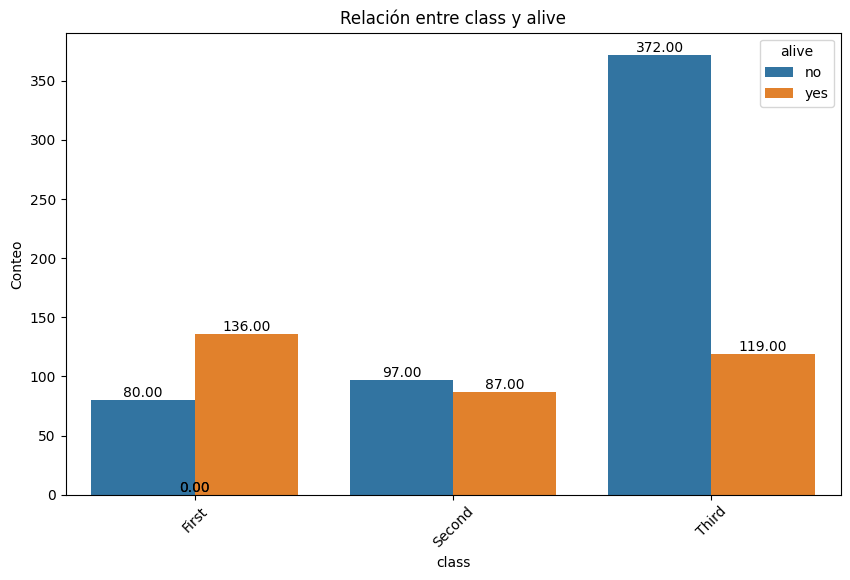

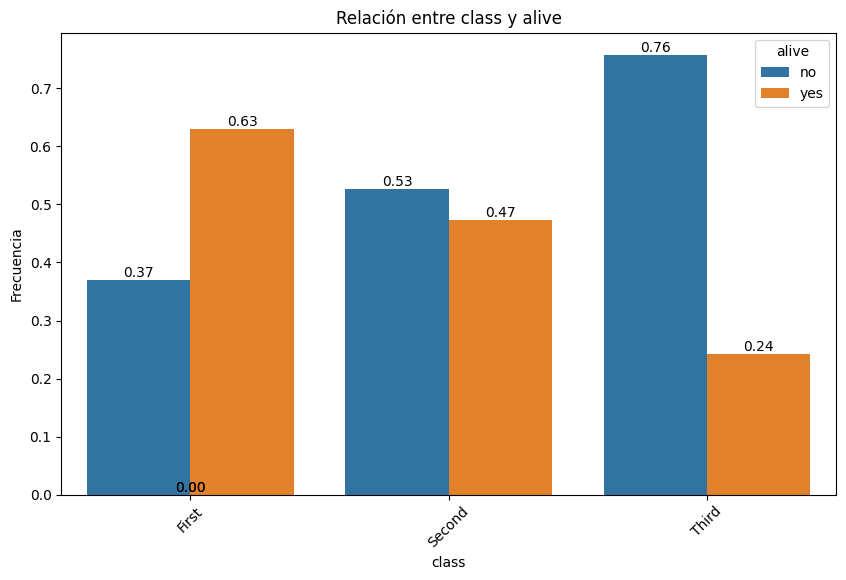

In [138]:
#3. ...la clase en la que viajases tuvo una influencia significativa y podría explicar...
plot_categorical_relationship_fin(df_titanic, "class", "alive", show_values = True)
plot_categorical_relationship_fin(df_titanic, "class", "alive", relative_freq = True, show_values = True)


/Users/jorge/bridge/code/ONLINE_DS_THEBRIDGE_jorgegp/Sprint_08/Unidad_02_Visualizacion_Avanzada_Seaborn/03_Practica_Obligatoria/bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


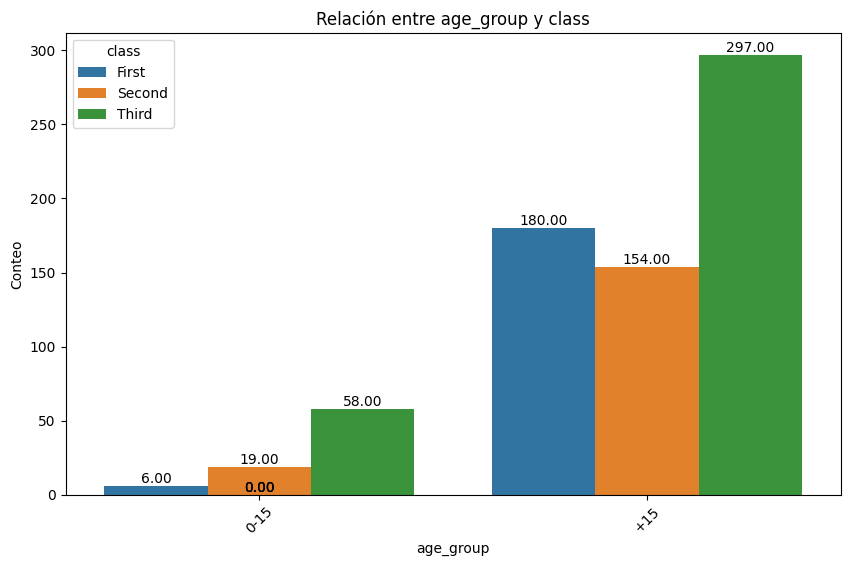

/Users/jorge/bridge/code/ONLINE_DS_THEBRIDGE_jorgegp/Sprint_08/Unidad_02_Visualizacion_Avanzada_Seaborn/03_Practica_Obligatoria/bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


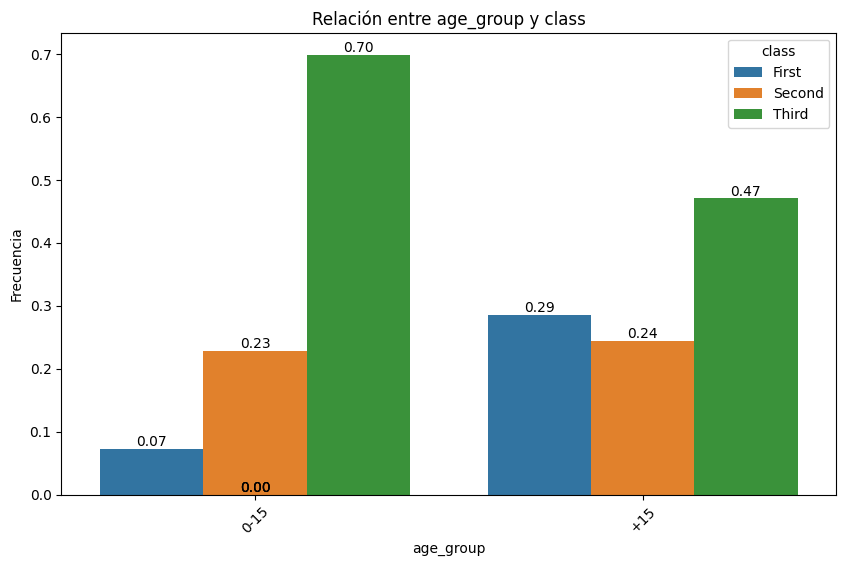

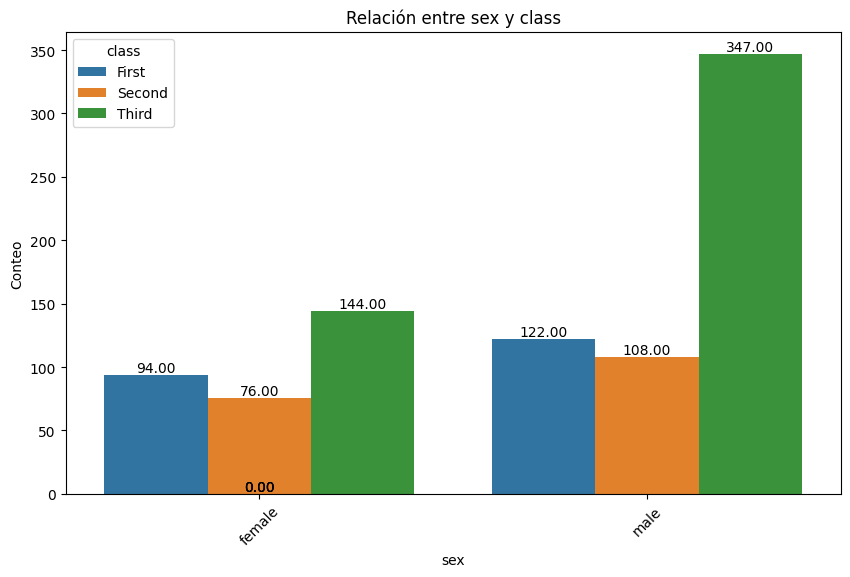

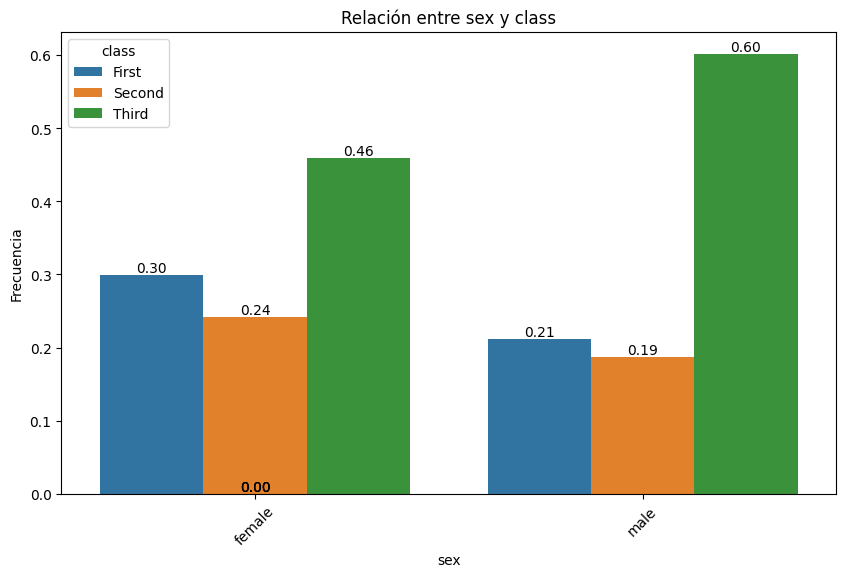

In [140]:
#4. ...las diferencias entre tasas de supervivencia de mujeres y niños.    
bins = [0, 15, 90]
labels = ["0-15","+15"]
df_titanic["age_group"] = pd.cut(df_titanic["age"], bins=bins, labels=labels)
plot_categorical_relationship_fin(df_titanic,"age_group","class", show_values = True)
plot_categorical_relationship_fin(df_titanic,"age_group","class", relative_freq = True, show_values = True)

plot_categorical_relationship_fin(df_titanic,"sex","class", show_values = True)
plot_categorical_relationship_fin(df_titanic,"sex","class", relative_freq = True, show_values = True)

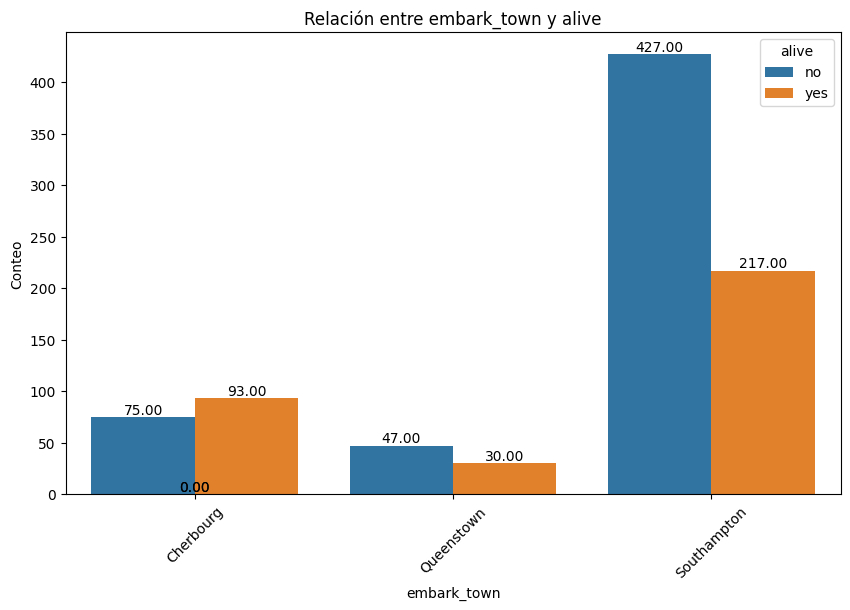

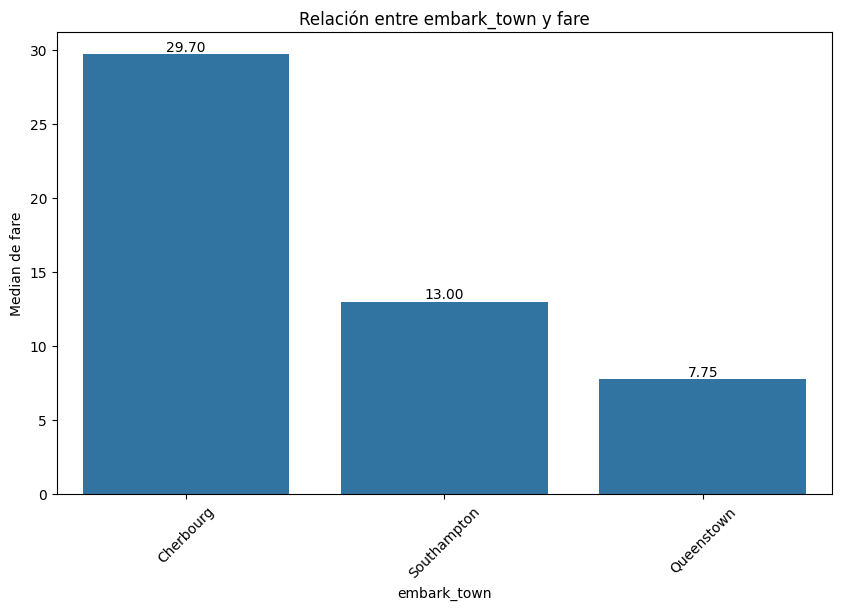

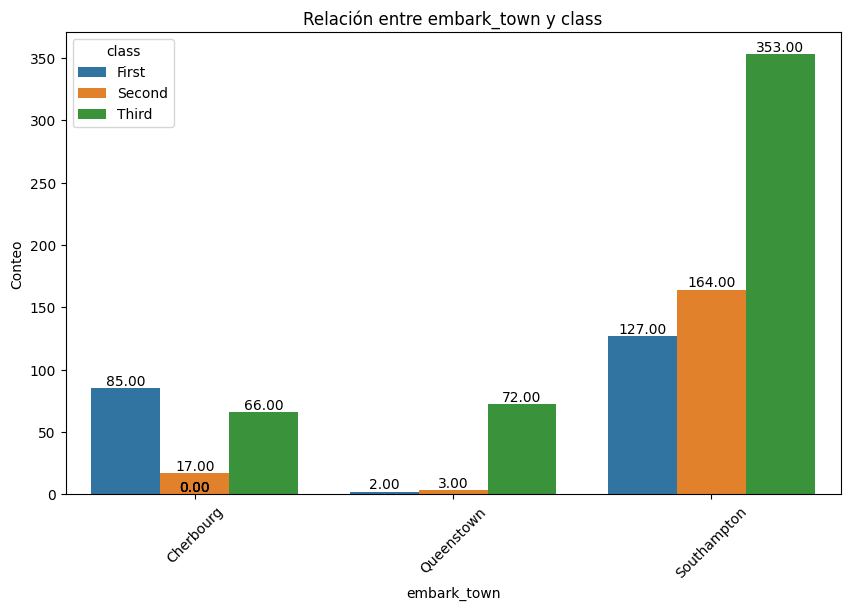

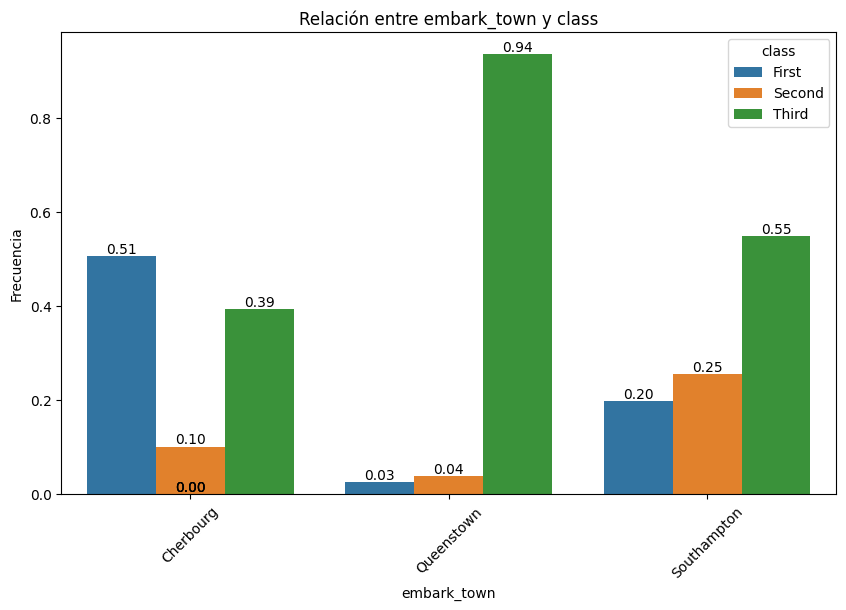

In [137]:
#5. Además, aunque el puerto de embarque parece tener influencia, se podría asumir que más bien fue la clase de pasaje que embarcó en cada uno de ellos.
plot_categorical_relationship_fin(df_titanic, "embark_town", "alive",show_values=True)
plot_categorical_numerical_relationship(df_titanic, "embark_town", "fare",measure="median", show_values=True)
plot_categorical_relationship_fin(df_titanic,"embark_town","class",show_values=True)
plot_categorical_relationship_fin(df_titanic,"embark_town","class", relative_freq = True, show_values = True)
